Let's do some GIS with Python!

# The GIS stack in Python 

In [ ]:
geopandas

In [ ]:
numpy
pandas 
shapely
fiona
six
pyproj
rtree (spatial indexing)

In [86]:
import geopandas as gpd
import pandas as pd
import io
import requests
from shapely.geometry import Point
import matplotlib.pylab as plt
%matplotlib inline

In [37]:
%load_ext watermark

In [60]:
%watermark?

In [63]:
%watermark -d -z -v -p pandas,geopandas,numpy,shapely,fiona,pyproj,rtree -g

2017-03-08 CET

CPython 2.7.10
IPython 4.0.2

pandas 0.18.1
geopandas 0+unknown
numpy 1.11.1
shapely 1.5.13
fiona 1.7.0.post2
pyproj 1.9.5.1
rtree 0.8.2
Git hash: 6934b6db46bc75bead0900d7b8879d210a270ccc


# Import some geolocated data

In [ ]:
# TODO: Find a good dataset.
# Here are some resources
https://freegisdata.rtwilson.com/ 

In [ ]:
# Flights data source
http://openflights.org/data.html

In [32]:
column_names = ['id', 'name', 'city', 'country', 'IATA', 'ICAO', 'latitude', 'longitude', 'altitude', 'timezone', 
                'dst', 'tz_database_time_zone', 'type', 'source']

In [65]:
airports_url="https://raw.githubusercontent.com/jpatokal/openflights/master/data/airports.dat"
df = pd.read_csv(airports_url, header=None, names=column_names)

In [66]:
df.head()

,id,name,city,country,IATA,ICAO,latitude,longitude,altitude,timezone,dst,tz_database_time_zone,type,source
0,1,Goroka Airport,Goroka,Papua New Guinea,GKA,AYGA,-6.081690,145.391998,5282,10,U,Pacific/Port_Moresby,airport,OurAirports
1,2,Madang Airport,Madang,Papua New Guinea,MAG,AYMD,-5.207080,145.789001,20,10,U,Pacific/Port_Moresby,airport,OurAirports
2,3,Mount Hagen Kagamuga Airport,Mount Hagen,Papua New Guinea,HGU,AYMH,-5.826790,144.296005,5388,10,U,Pacific/Port_Moresby,airport,OurAirports
3,4,Nadzab Airport,Nadzab,Papua New Guinea,LAE,AYNZ,-6.569803,146.725977,239,10,U,Pacific/Port_Moresby,airport,OurAirports
4,5,Port Moresby Jacksons International Airport,Port Moresby,Papua New Guinea,POM,AYPY,-9.443380,147.220001,146,10,U,Pacific/Port_Moresby,airport,OurAirports


In [83]:
type(df)

pandas.core.frame.DataFrame

# Transform Pandas DataFrame into a GeoPandas DataFrame

In [75]:
def longitude_latitude_to_geom(row):
    p = Point(row['longitude'], row['latitude'], row['altitude'])
    return p

In [88]:
def add_geometry_column(input_df):
    df = input_df.copy()
    return df.assign(geometry=lambda df: df.apply(longitude_latitude_to_geom, axis=1))

In [89]:
def create_gdf_from_df(input_df):
    df = input_df.copy()
    return (df.pipe(add_geometry_column)
              .drop(['longitude', 'latitude', 'altitude'], axis=1)
              .pipe(gpd.GeoDataFrame))

In [90]:
gdf = df.pipe(create_gdf_from_df)

In [91]:
type(gdf)

geopandas.geodataframe.GeoDataFrame

# Map of Airports

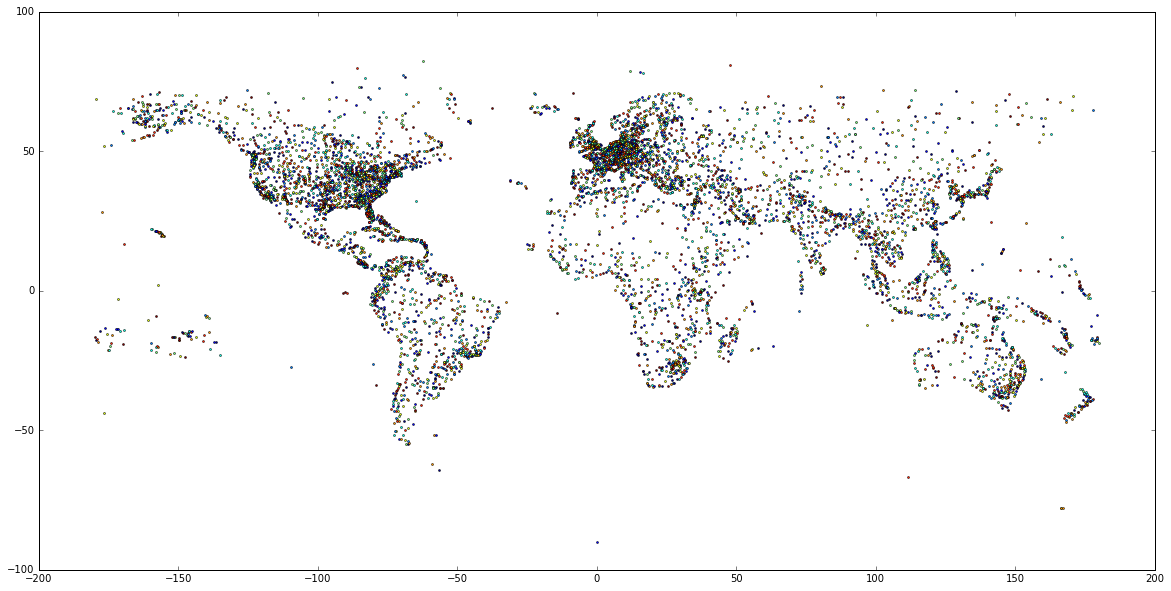

In [93]:
gdf.plot(figsize=(20, 20))

# Putting everything together